In [3]:
import tensorflow as tf

# Load the saved model
model = tf.keras.models.load_model('best_model.h5')

In [4]:
import numpy as np
from tensorflow.keras.datasets import mnist

# Load MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Normalize the images to the range [0, 1]
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# Reshape the data to fit the model input (28x28x1)
x_train = np.expand_dims(x_train, axis=-1)
x_test = np.expand_dims(x_test, axis=-1)

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 20s 2us/step


In [7]:
# Make predictions on the test set
predictions = model.predict(x_test)

# Convert predictions from probabilities to class labels
predicted_classes = np.argmax(predictions, axis=1)

# Calculate accuracy
accuracy = np.mean(predicted_classes == y_test)
print(f"Model Accuracy on MNIST Test Dataset: {accuracy * 100:.2f}%")

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step
Model Accuracy on MNIST Test Dataset: 99.59%


## Test with written numbers

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


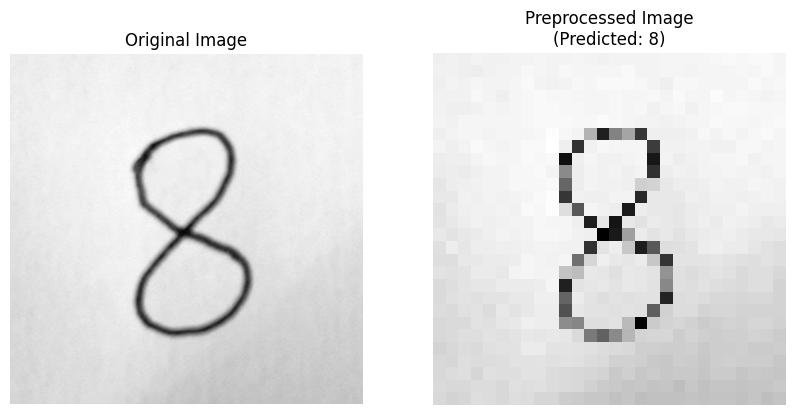

Image: eight.jpg, Predicted Digit: 8
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


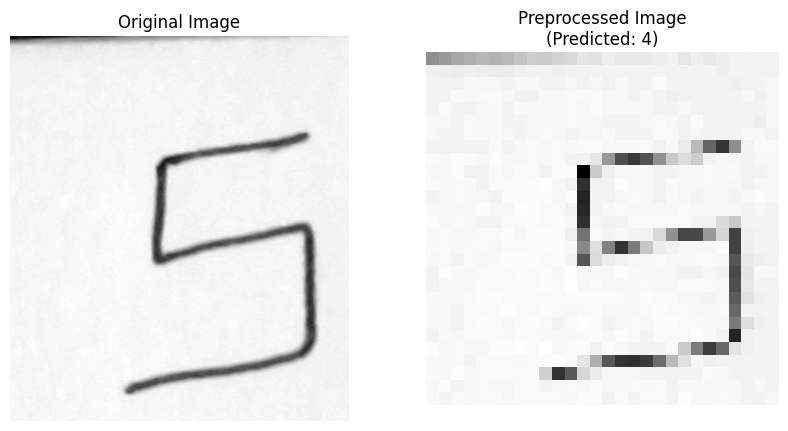

Image: five.jpg, Predicted Digit: 4
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step


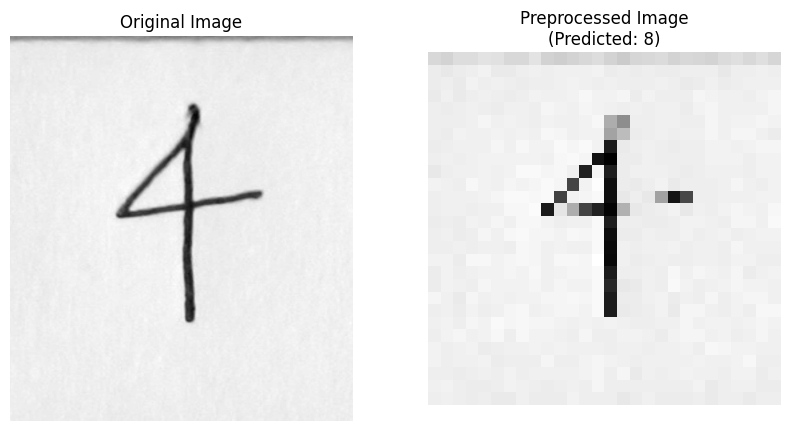

Image: four.jpg, Predicted Digit: 8
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


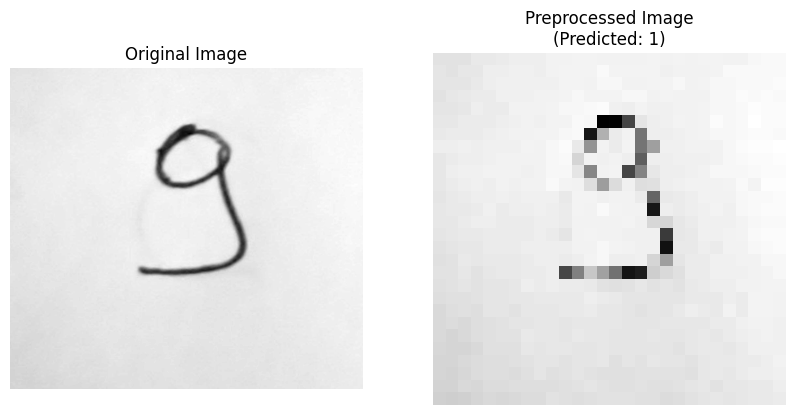

Image: nine.jpg, Predicted Digit: 1
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step


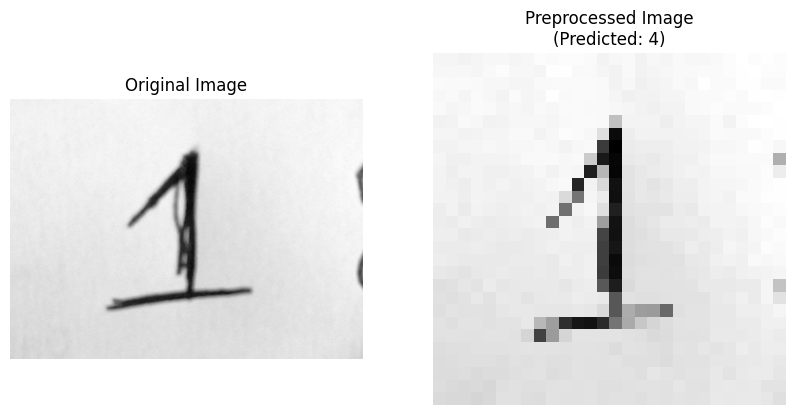

Image: one.jpg, Predicted Digit: 4
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step


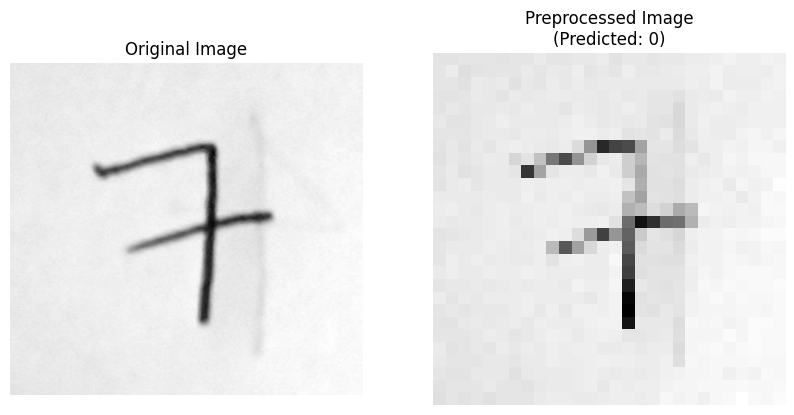

Image: seven.jpg, Predicted Digit: 0
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step


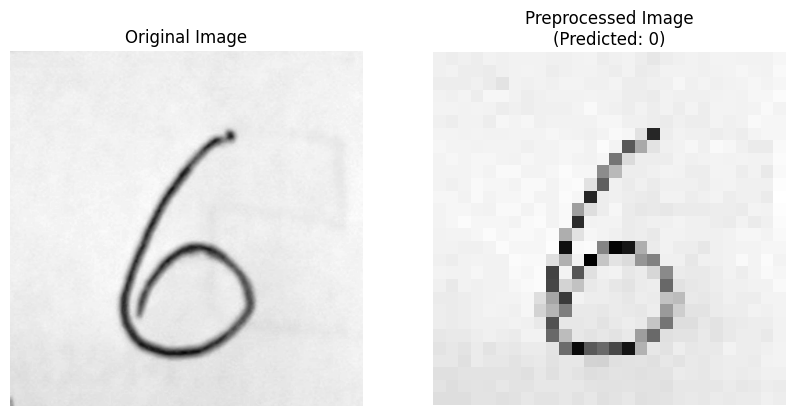

Image: six.jpg, Predicted Digit: 0
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


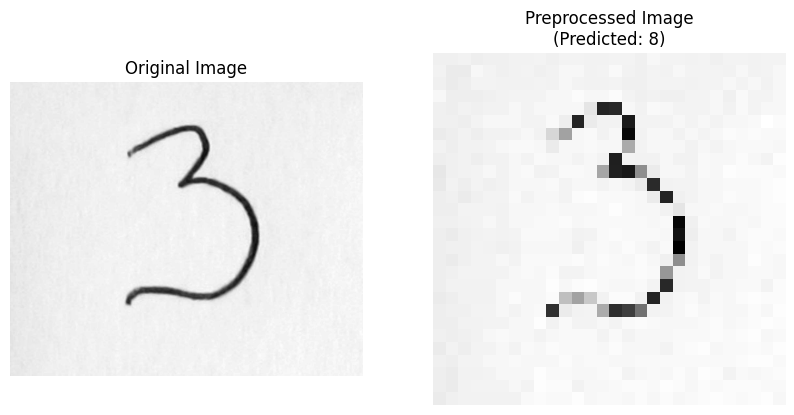

Image: three.jpg, Predicted Digit: 8
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 111ms/step


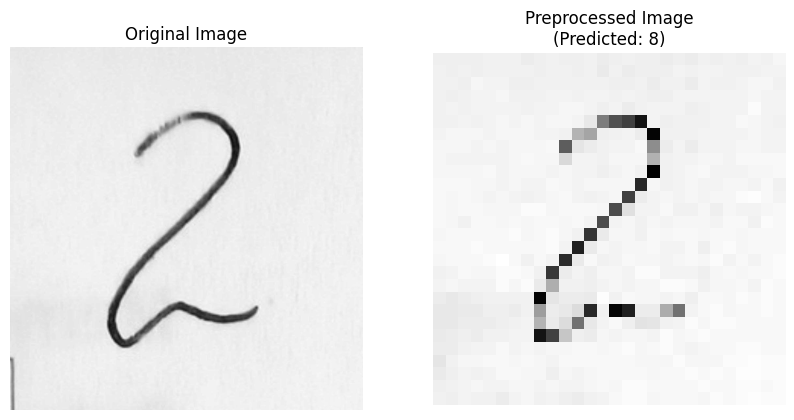

Image: two.jpg, Predicted Digit: 8
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step


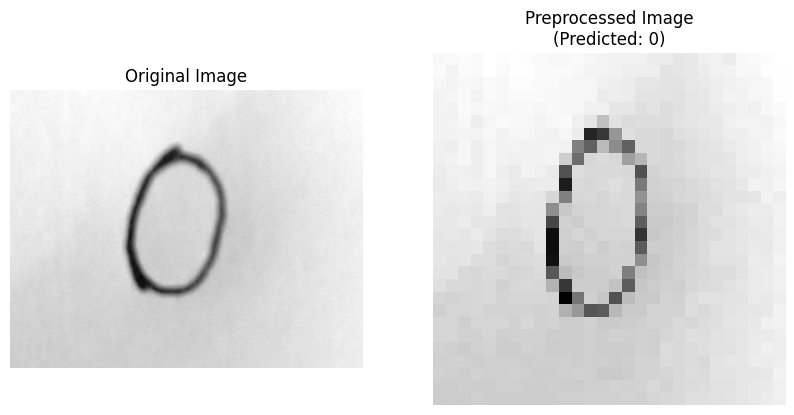

Image: zero.jpg, Predicted Digit: 0


In [14]:
import cv2
import os
import matplotlib.pyplot as plt
import numpy as np

# Function to preprocess the image
def preprocess_image(image_path):
    # Read the image in grayscale
    img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    
    # Resize the image to 28x28
    img_resized = cv2.resize(img, (28, 28))
    
    # Normalize pixel values to [0, 1]
    img_normalized = img_resized.astype('float32') / 255.0
    
    # Reshape to match the model's expected input (1, 28, 28, 1)
    img_normalized = np.expand_dims(img_normalized, axis=-1)  # Add channel dimension
    img_normalized = np.expand_dims(img_normalized, axis=0)  # Add batch dimension
    
    return img, img_resized, img_normalized

image_folder = 'digits'

for image_name in os.listdir(image_folder):
    image_path = os.path.join(image_folder, image_name)
    
    # Preprocess and get both original and resized images
    original, resized, preprocessed = preprocess_image(image_path)
    
    # Make predictions
    prediction = model.predict(preprocessed)
    predicted_class = np.argmax(prediction, axis=1)[0]
    
    # Display the images side by side
    plt.figure(figsize=(10, 5))

    # Original image
    plt.subplot(1, 2, 1)
    plt.imshow(original, cmap='gray')
    plt.title("Original Image")
    plt.axis('off')

    # Preprocessed image
    plt.subplot(1, 2, 2)
    plt.imshow(resized, cmap='gray')
    plt.title(f"Preprocessed Image\n(Predicted: {predicted_class})")
    plt.axis('off')

    plt.show()

    print(f"Image: {image_name}, Predicted Digit: {predicted_class}")
